IAA Trabajo Práctico 1: Árboles de decisión

# Funciones Auxiliares

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive


In [ ]:
def centroGauss(d, v):
  return [v]*d

def covMatrix(d, C):
  return np.identity(d)*([(C*np.sqrt(d))**2]*d)

def diagonales(n, d, C):
  n0 = int(n/2)
  n1 = n - n0
  matriz = covMatrix(d, C)
  valores0 = np.random.multivariate_normal(centroGauss(d, -1), matriz, n0)
  valores1 = np.random.multivariate_normal(centroGauss(d, 1), matriz, n1)

  data = [[0, *x] for x in valores0] + [[1, *x] for x in valores1]

  return pd.DataFrame(data, columns=['Target', *['d' + str(x + 1) for x in range(d)]])

In [ ]:
def covMatrixP(d, C):
  return np.identity(d)*([C**2]*d)

def paralelas(n, d, C):
  n0 = int(n/2)
  n1 = n - n0
  matriz = covMatrixP(d, C)
  centro = centroGauss(d, 0)
  centro[0] = -1
  valores0 = np.random.multivariate_normal(centro, matriz, n0)
  centro[0] = 1
  valores1 = np.random.multivariate_normal(centro, matriz, n1)

  data = [[0, *x] for x in valores0] + [[1, *x] for x in valores1]

  return pd.DataFrame(data, columns=['Target', *['d' + str(x + 1) for x in range(d)]])

In [ ]:
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def is_inside_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*np.pi) / (4 * np.pi)
  rho_curve2 = (theta + npi*np.pi) / (4 * np.pi)
  return rho_curve1 <= rho <= rho_curve2

def is_inside_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    return is_inside_curve(rho, theta, 1) or is_inside_curve(rho, theta, 3) or is_inside_curve(rho, theta, 5)

def espirales(n):
  n0 = int(n/2)
  n1 = n - n0
  i0, i1 = 0, 0
  values0, values1 = [], []
  while (i0 + i1 < n):
    x, y = np.random.uniform(-1, 1, 2)
    if (np.sqrt(x**2 + y**2) > 1):
      continue
    if (is_inside_curves(x, y)):
      if (i0 != n0):
        values0.append([x, y])
        i0 += 1
    else:
      if (i1 != n1):
        values1.append([x, y])
        i1 += 1

  data = [[0, *x] for x in values0] + [[1, *x] for x in values1]

  return pd.DataFrame(data, columns=['Target', 'd1', 'd2'])

In [ ]:
def plotGrafico(x, y):
  i, n = 0, len(y)
  xs0, ys0, xs1, ys1 = [], [], [], []
  while (i < n):
    if (y[i] == 0):
      xs0.append(x[i][0])
      ys0.append(x[i][1])
    else:
      xs1.append(x[i][0])
      ys1.append(x[i][1])
    i += 1

  plt.scatter(xs0, ys0, color='red', facecolors='none', label='Clase 0')
  plt.scatter(xs1, ys1, color='green', facecolors='none', label='Clase 1')
  plt.legend()
  plt.show()

# Ejercicio 1


In [ ]:
dfTrain1 = espirales(150)
xTrain1 = dfTrain1[['d1', 'd2']].values
yTrain1 = dfTrain1['Target'].values

dfTrain2 = espirales(600)
xTrain2 = dfTrain2[['d1', 'd2']].values
yTrain2 = dfTrain2['Target'].values

dfTrain3 = espirales(3000)
xTrain3 = dfTrain3[['d1', 'd2']].values
yTrain3 = dfTrain3['Target'].values

dfTest = espirales(10000)
xTest = dfTest[['d1', 'd2']].values
yTest = dfTest['Target'].values

Entrenamiento con 150

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(xTrain1, yTrain1)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002,
                       min_samples_leaf=5, random_state=0)

Accurracy:
0.6268


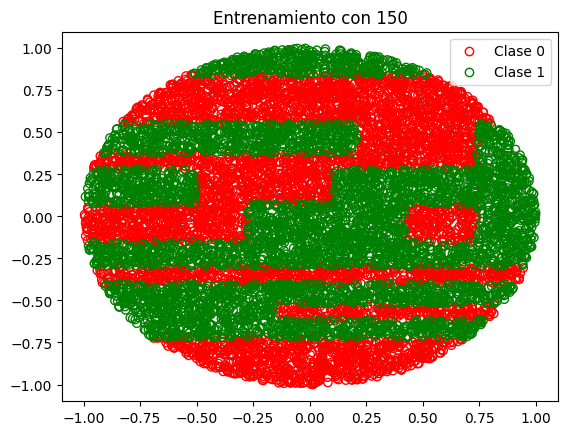

In [ ]:
print("Accurracy:")
print(clf.score(xTest, yTest))

result = clf.predict(xTest)

plt.title('Entrenamiento con 150')
plotGrafico(xTest, result)

Entrenamiento con 600

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(xTrain2, yTrain2)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002,
                       min_samples_leaf=5, random_state=0)

Accurracy:
0.8187


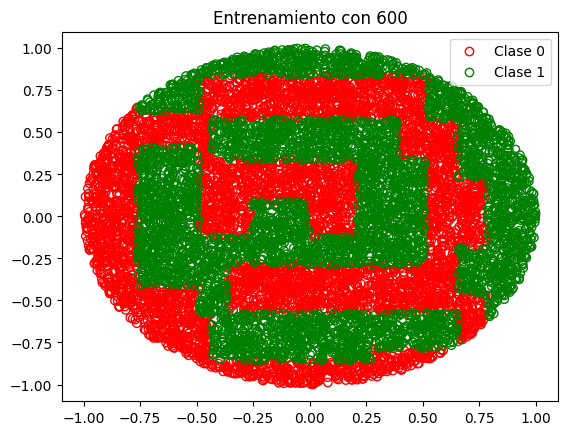

In [ ]:
print("Accurracy:")
print(clf.score(xTest, yTest))

result = clf.predict(xTest)

plt.title('Entrenamiento con 600')
plotGrafico(xTest, result)

Entrenamiento con 3000

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(xTrain3, yTrain3)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002,
                       min_samples_leaf=5, random_state=0)

Accurracy:
0.9073


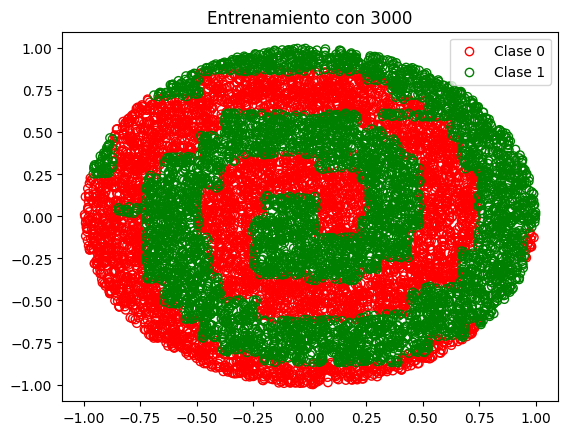

In [ ]:
print("Accurracy:")
print(clf.score(xTest, yTest))

result = clf.predict(xTest)

plt.title('Entrenamiento con 3000')
plotGrafico(xTest, result)

Comentarios:

Claramente, haciendo que los conjuntos de entrenamiento sean cada vez más grandes se consigue un mejor entrenamiento. Esto se puede ver con los resultados del accuracy de los datos de testeo por sobre los árboles generados.

Para este ejercicio dado, no considero que se pueda llegar a un punto de sobreajuste, ya que agregando cada vez más puntos a los conjuntos de entrenamiento, se irán distribuyendo cada vez más sobre las espirales.

Dicho de otra manera, ya que los puntos tienen la clase del espiral al que pertenecen y pueden pertenecer a uno solo, no existe el ruido en este dataset. De esta manera, tomar cada vez más elementos para entrenar solo provocará que se aprenda aún más este modelo e irá aumentando el accuracy en los datos de testeo.

# Ejercicio 2


In [ ]:
n = [125, 250, 500, 1000, 2000, 4000]

## Diagonales

Generacion de arboles

In [ ]:
test = diagonales(10000, 2, 0.78)

xTest = test[['d1', 'd2']].values
yTest = test['Target'].values

errorDiag = []
sizeTreeDiag = []
graficoDiag = []

for i in n:
  errorI = []
  sizeTreeI = []

  for _ in range(20):
    train = diagonales(i, 2, 0.78)

    xTrain = train[['d1', 'd2']].values
    yTrain = train['Target'].values

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    errorI.append((1 - clf.score(xTrain, yTrain), 1 - clf.score(xTest, yTest)))
    sizeTreeI.append(clf.tree_.node_count)

  result = clf.predict(xTest)

  graficoDiag.append((xTest, result, i))

  errorDiag.append((np.average([x for x, y in errorI]), np.average([y for x, y in errorI])))
  sizeTreeDiag.append(np.average(sizeTreeI))

Graficar testeo

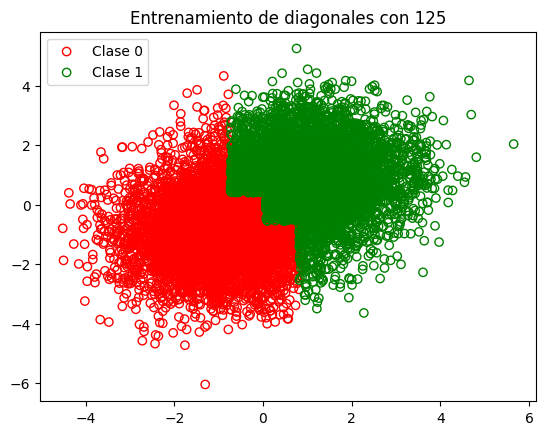

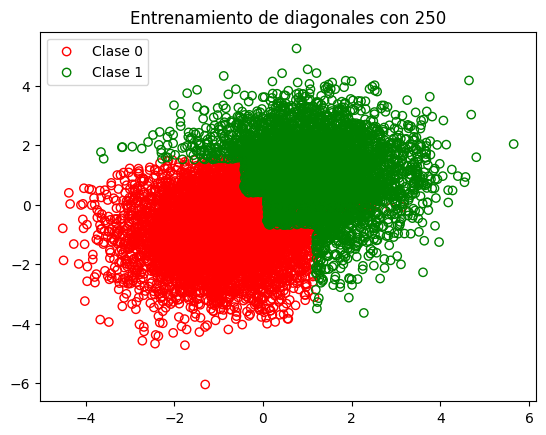

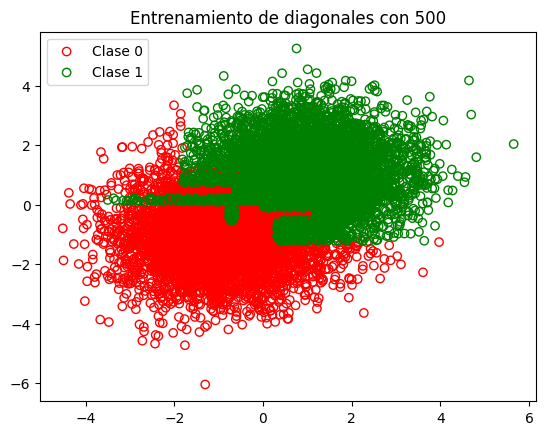

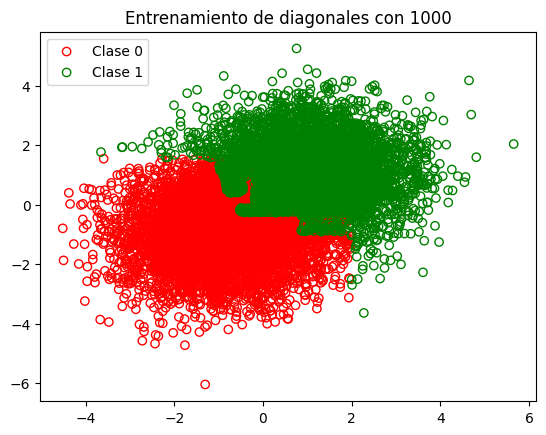

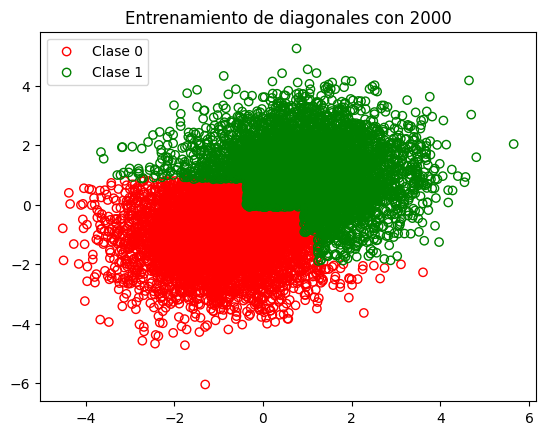

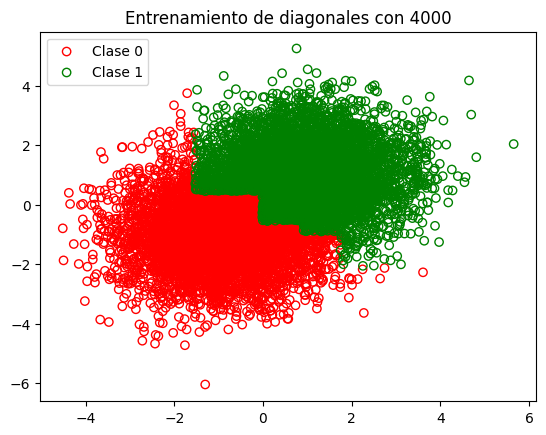

In [ ]:
for (x, y, i) in graficoDiag:
  plt.title('Entrenamiento de diagonales con ' + str(i))
  plotGrafico(x, y)

## Paralelas

Generacion de arboles

In [ ]:
test = paralelas(10000, 2, 0.78)

xTest = test[['d1', 'd2']].values
yTest = test['Target'].values

errorPara = []
sizeTreePara = []
graficoPara = []

for i in n:
  errorI = []
  sizeTreeI = []

  for _ in range(20):
    train = paralelas(i, 2, 0.78)

    xTrain = train[['d1', 'd2']].values
    yTrain = train['Target'].values

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    errorI.append((1 - clf.score(xTrain, yTrain), 1 - clf.score(xTest, yTest)))
    sizeTreeI.append(clf.tree_.node_count)

  result = clf.predict(xTest)

  graficoPara.append((xTest, result, i))

  errorPara.append((np.average([x for x, y in errorI]), np.average([y for x, y in errorI])))
  sizeTreePara.append(np.average(sizeTreeI))

Graficar testeo

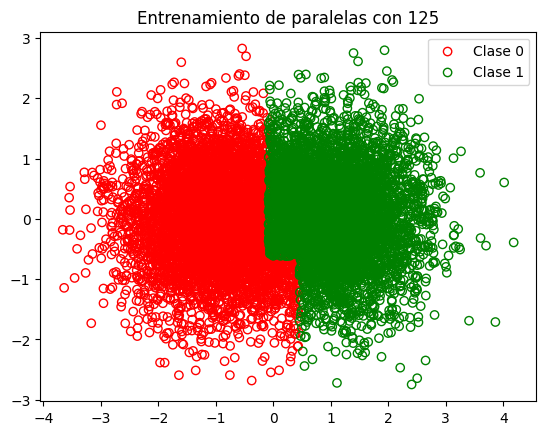

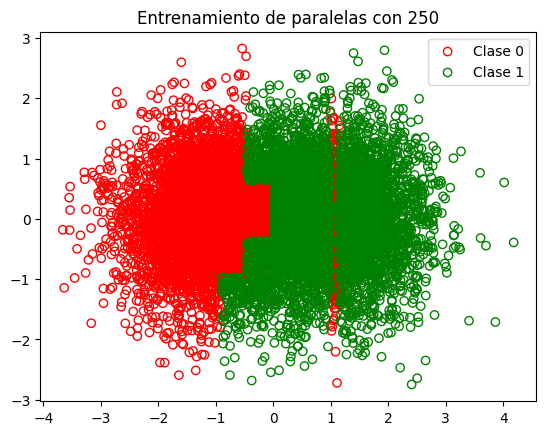

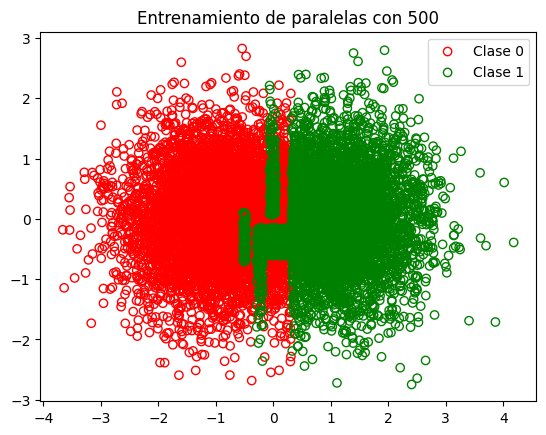

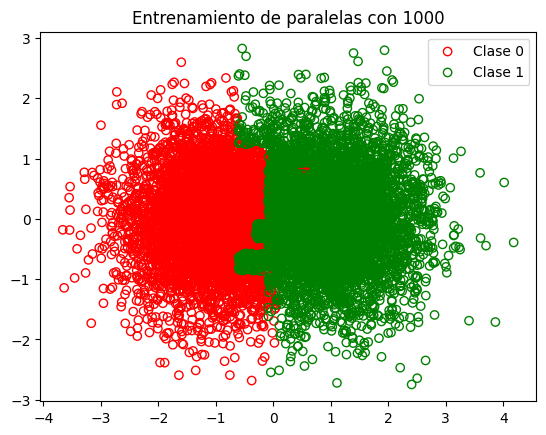

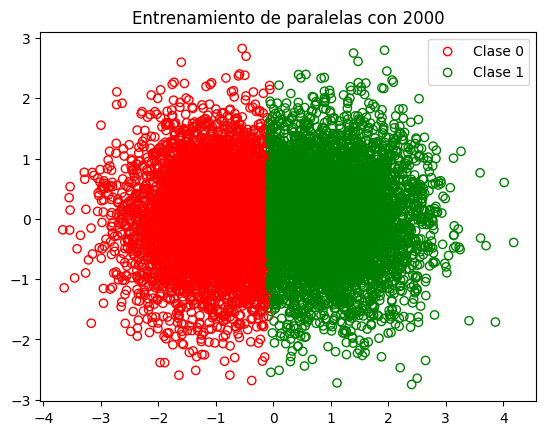

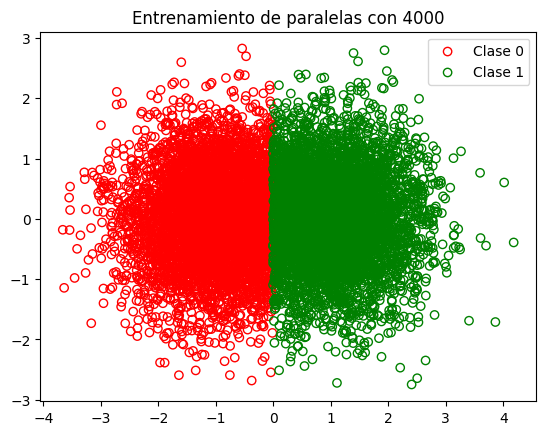

In [ ]:
for (x, y, i) in graficoPara:
  plt.title('Entrenamiento de paralelas con ' + str(i))
  plotGrafico(x, y)

## Graficos finales

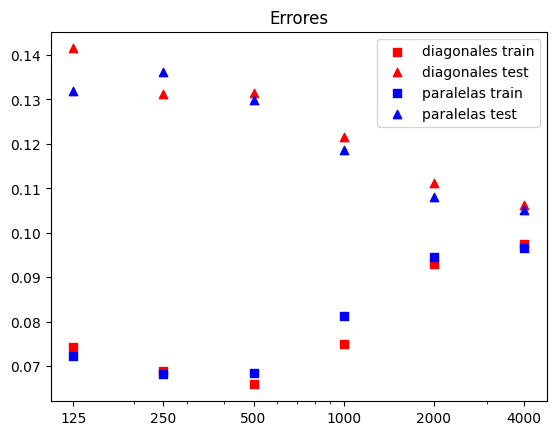

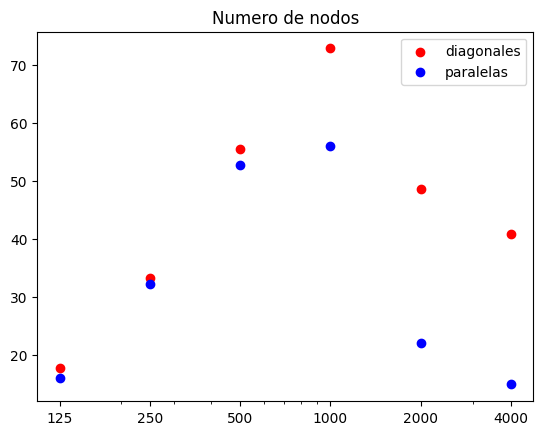

In [ ]:
plt.scatter(n, [x for x, y in errorDiag], color='red', marker=',', label='diagonales train')
plt.scatter(n, [y for x, y in errorDiag], color='red', marker='^', label='diagonales test')
plt.scatter(n, [x for x, y in errorPara], color='blue', marker=',', label='paralelas train')
plt.scatter(n, [y for x, y in errorPara], color='blue', marker='^', label='paralelas test')
plt.xscale('log')
plt.xticks(n, labels=[str(i) for i in n])
plt.legend()
plt.title('Errores')
plt.show()

plt.scatter(n, sizeTreeDiag, color='red', label='diagonales')
plt.scatter(n, sizeTreePara, color='blue', label='paralelas')
plt.xscale('log')
plt.xticks(n, labels=[str(i) for i in n])
plt.legend()
plt.title('Numero de nodos')
plt.show()

Diagonales:

Al ir aumentando puntos de entrenamiento en los datasets, se puede notar que no solo baja el error en el conjunto de testeo, sino que también comienza a haber una división visual más notoria entre las clases de los puntos.

Al existir una desviación estándar, ocurre que haya varios puntos de diferentes clases en una misma zona (existiendo el ruido), pero es claro que los puntos de cada clase estarán concentrados en el punto origen de estas. Considero que al ir entrenando el árbol con cada vez más puntos, este determinará la clase del punto dependiendo de qué lado de la función "f(x)=-x" está el punto. Básicamente, determinará la clase del punto dependiendo de la distancia a los orígenes, dicho de otra manera, tendrá la clase del origen más cercano.

Paralelas:

En el caso de las paralelas, considero que sucede exactamente lo mismo, con la diferencia en que el árbol terminará determinando la clase del punto a testear dependiendo del signo de su coordenada en el eje x.

Gráficos:

En el caso del gráfico de errores se puede ver de lo que hablaba antes, ya que los árboles están en camino de determinar la clase del punto a partir del "lado de la recta" donde se ubica, cada par de errores (de entrenamiento y testeo) están tendiendo a un único valor dado por los puntos de cada clase que están ubicados del lado equivocado de la recta.

Y en cuanto al gráfico de número de nodos, se puede ver cómo ambos inicialmente suben a medida que aumenta la cantidad de puntos de entrenamiento, pero eventualmente comienzan a bajar. Esto sucede ya que inicialmente se va complejizando el árbol resultante ya que al haber pocos puntos, este se entrenaba a partir de casos aislados, resultando en formas "raras" que podemos ver en los primeros gráficos de cada generación. Eventualmente (a partir de los 1000 puntos de entrenamiento), ambos dejan de intentar entrenar a partir de estos casos aislados y comienzan a intentar modelar la recta de la que hablaba anteriormente. También se puede ver que el número de nodos de las paralelas baja más abruptamente que el otro, considero que es porque es menos complejo determinar este caso que el de diagonales. Esto se debe a que para intentar modelar la recta "f(x)=-x", son necesarios muchos más nodos que simplemente el nodo necesario en el de paralelas "clase0 if x < 0 else clase1". Cabe aclarar que el árbol no podrá modelar divisiones transversales, solo podrá simular estar mediante muchas divisiones en ambas dimensiones (muchas divisiones horizontales y verticales). Además, aunque haya bajado el número de nodos en el caso de diagonales, considero que mientras más casos se presenten este volverá a subir para intentar modelar la recta.

# Ejercicio 3

In [ ]:
c = [0.5, 1, 1.5, 2, 2.5]

## Generacion Arboles

In [ ]:
errorDiag = []

for i in c:
  test = diagonales(10000, 5, i)

  xTest = test[['d' + str(n + 1) for n in range(5)]].values
  yTest = test['Target'].values

  errorI = []
  sizeTreeI = []

  for _ in range(20):
    train = diagonales(250, 5, i)

    xTrain = train[['d' + str(n + 1) for n in range(5)]].values
    yTrain = train['Target'].values

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    errorI.append(1 - clf.score(xTest, yTest))

  errorDiag.append(np.average(errorI))

In [ ]:
errorPara = []

for i in c:
  test = paralelas(10000, 5, i)

  xTest = test[['d' + str(n + 1) for n in range(5)]].values
  yTest = test['Target'].values

  errorI = []
  sizeTreeI = []

  for _ in range(20):
    train = paralelas(250, 5, i)

    xTrain = train[['d' + str(n + 1) for n in range(5)]].values
    yTrain = train['Target'].values

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    errorI.append(1 - clf.score(xTest, yTest))

  errorPara.append(np.average(errorI))

## Ejercicio 3.1

In [ ]:
def predecirClase(lista, d, isParalelo):
  prediccion = []

  if isParalelo == 0:
    clase0 = [-1] * d
    clase1 = [1] * d
  else:
    clase0 = [0] * d
    clase0[0] = -1
    clase1 = [0] * d
    clase1[0] = 1

  for elem in lista:
    dist0 = np.linalg.norm(clase0 - elem)
    dist1 = np.linalg.norm(clase1 - elem)

    if dist0 < dist1:
      prediccion.append(0)
    elif dist1 < dist0:
      prediccion.append(1)
    else:
      x = np.random.random()
      if x < 0.5:
        prediccion.append(0)
      else:
        prediccion.append(1)

  return prediccion

In [ ]:
minimoErrorDiag = []

for i in c:
  test = diagonales(200000, 5, i)

  xTest = test[['d' + str(n + 1) for n in range(5)]].values
  yTest = test['Target'].values

  prediccion = predecirClase(xTest, 5, 0)

  minimoErrorDiag.append(1 - (np.sum(yTest == prediccion)/200000))

In [ ]:
minimoErrorPara = []

for i in c:
  test = paralelas(200000, 5, i)

  xTest = test[['d' + str(n + 1) for n in range(5)]].values
  yTest = test['Target'].values

  prediccion = predecirClase(xTest, 5, 1)

  minimoErrorPara.append(1 - (np.sum(yTest == prediccion)/200000))

## Grafico final

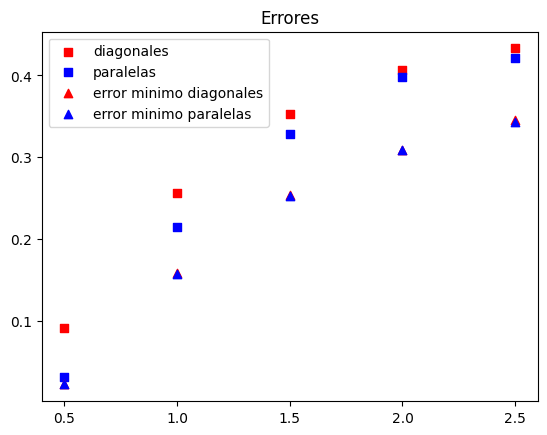

In [ ]:
plt.scatter(c, errorDiag, color='red', marker=',', label='diagonales')
plt.scatter(c, errorPara, color='blue', marker=',', label='paralelas')
plt.scatter(c, minimoErrorDiag, color='red', marker='^', label='error minimo diagonales')
plt.scatter(c, minimoErrorPara, color='blue', marker='^', label='error minimo paralelas')
plt.xticks(c)
plt.legend()
plt.title('Errores')
plt.show()

Para el ejercicio 3.1, hice una función que determina la clase de un punto dependiendo de la cercanía a los orígenes (lo mismo que hablé en el ejercicio 2). A pesar de que con la desviación estándar los puntos se generen más lejos de su origen y más cerca del otro, al ser una distribución normal, estos estarán ubicados en mayor medida mientras más cerca de su origen estén, y de ahí vino mi idea para la función. Cabe aclarar que para el caso en que estén justo en el medio de los dos orígenes, se elegirá uno al azar; se generará un número "x" random y si es menor a "0.5", el punto será de una clase y en caso contrario pertenecerá a la otra.

En cuanto al gráfico, se puede ver cómo a medida que aumenta la desviación estándar, va aumentando la medida de error. Esto se debe a que al ir creciendo esta, los puntos se van generando aún más lejos de su origen y habrá zonas donde haya puntos de diferentes clases (ruido). En mi opinión, si se entrenase a los árboles con más puntos, el error iría tendiendo al error mínimo calculado.

# Ejercicio 4


In [ ]:
d = [2, 4, 8, 16, 32]

In [ ]:
errorDiag = []

for i in d:
  test = diagonales(10000, i, 0.78)

  xTest = test[['d' + str(n + 1) for n in range(i)]].values
  yTest = test['Target'].values

  errorI = []

  for _ in range(20):
    train = diagonales(250, i, 0.78)

    xTrain = train[['d' + str(n + 1) for n in range(i)]].values
    yTrain = train['Target'].values

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    errorI.append((1 - clf.score(xTrain, yTrain), 1 - clf.score(xTest, yTest)))

  errorDiag.append(((np.average([x for x, y in errorI]), np.average([y for x, y in errorI]))))

In [ ]:
errorPara = []

for i in d:
  test = paralelas(10000, i, 0.78)

  xTest = test[['d' + str(n + 1) for n in range(i)]].values
  yTest = test['Target'].values

  errorI = []

  for _ in range(20):
    train = paralelas(250, i, 0.78)

    xTrain = train[['d' + str(n + 1) for n in range(i)]].values
    yTrain = train['Target'].values

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    errorI.append((1 - clf.score(xTrain, yTrain), 1 - clf.score(xTest, yTest)))

  errorPara.append(((np.average([x for x, y in errorI]), np.average([y for x, y in errorI]))))

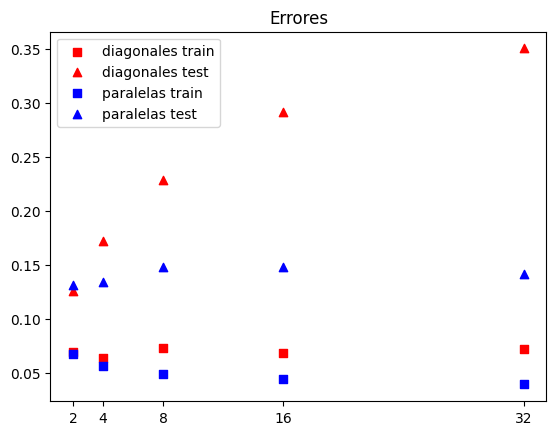

In [ ]:
plt.scatter(d, [x for x, y in errorDiag], color='red', marker=',', label='diagonales train')
plt.scatter(d, [y for x, y in errorDiag], color='red', marker='^', label='diagonales test')
plt.scatter(d, [x for x, y in errorPara], color='blue', marker=',', label='paralelas train')
plt.scatter(d, [y for x, y in errorPara], color='blue', marker='^', label='paralelas test')
plt.xticks(d)
plt.legend()
plt.title('Errores')
plt.show()

Inicialmente, se puede ver cómo todos los errores son bastante estables sobre el número de dimensiones excepto el testeo en diagonales. De cualquier manera, intentaré centrarme únicamente en los testeos ya que, al ser los conjuntos de entrenamiento tan pequeños, no considero que los puntos se hayan distribuido lo suficiente sobre el espacio como para brindar datos significativos.

Ahora, hablando sobre los conjuntos de testeo, considero que el error para el conjunto de testeo de paralelas tiende a quedarse más estable sobre el número de dimensiones debido a que la generación de los puntos no tiene tan en cuenta el número de dimensiones como en el caso de las diagonales.
```
return np.identity(d)*([(C*np.sqrt(d))^2]*d)
= return np.identity(d)*([d*C^2]*d)
return np.identity(d)*([C^2]*d)
```
Siendo estas las funciones para generar las matrices de covarianza para diagonales y paralelas respectivamente, se puede ver cómo en diagonales se tiene en cuenta las dimensiones para los valores de la matriz mientras que en paralelas no. Básicamente, los valores de la matriz estarán multiplicados por el número de dimensiones, haciendo que los puntos se generen más lejos del origen, y eso ocasionando que haya más ruido, provocando una mayor tasa de error.

# Ejercico 5

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IAA 2024/TP1/xor.csv', header=None, names=['x', 'y', 'Target'])

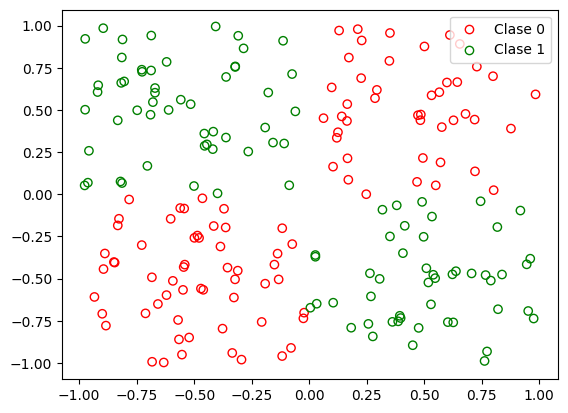

In [ ]:
valores = df[['x', 'y']].values
target = df['Target'].values

plotGrafico(valores, target)

In [ ]:
def predictXor(values):
  prediccion = []
  for x, y in values:
    if x < 0:
      if y < 0:
        prediccion.append(0)
      else:
        prediccion.append(1)
    else:
      if y < 0:
        prediccion.append(1)
      else:
        prediccion.append(0)
  return prediccion

In [ ]:
prediccion = predictXor(valores)
print("Accurracy:")
print(np.sum(target == prediccion)/len(valores))

Accurracy:
1.0


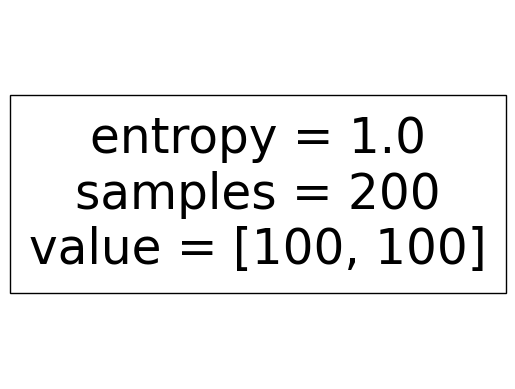

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
clf.fit(valores, target)
tree.plot_tree(clf)
plt.show()

A simple vista, a uno le podría parecer extraño que el árbol no se extienda más que el nodo inicial, dado que el problema es claramente simple de resolver.

Pero al razonar sobre esto, podemos notar que al ser el criterio para la división en nodos la ganancia de información y que el decrecimiento mínimo de impureza debe ser 0.03, esto podría estar ocurriendo ya que al dividir los nodos mediante este criterio no se alcanza a disminuir la impureza (la entropía) en una medida más grande que este valor.

Comprobando mi teoría, realicé un entrenamiento del árbol con min_impurity_decrease=0.02, y pude ver que en este caso sí se realizó un entrenamiento. En este se podía observar que la raíz se dividía inicialmente en 2 nodos, uno con únicamente 5 muestras de clase 1, y el otro con 100 de clase 0 y 95 de clase 1. Adicionalmente, investigando sobre cómo se calcula el min_impurity_decrease, este tiene la siguiente fórmula:

```
N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
```

Donde N_t es la cantidad de muestras en el nodo actual, N la cantidad total de muestras, N_t_R y N_t_L la cantidad de muestras en los nodos derecho e izquierdo respectivamente, y el resto son las impurezas de los nodos.

De esta manera, se podría calcular el min_impurity_decrease para verificar lo que decía.

```
impurity_right = - (100/195 * log_2 (100/195)) - (95/195 * log_2 (95/195)) = 0.9995

impurity_left = - (0/5 * log_2 (0/5)) - (5/5 * log (5/5)) = 0

min_impurity_decrease = 200/200 * (impurity - 195/200 * impurity_right - 5/200 * impurity_left) = (1 - 0.9745 - 0) - 0.0255 < 0.03
```

Aqui se comprueba que lo planteado era correcto.